In [173]:
# Import all the library
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import knnimpute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [174]:
data = pd.read_excel('data/data_set.xls', header=0, na_values= ['',' ','NA','na','Na','N/A','N/a','n/a'])

In [175]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [176]:
#Defining feature as categorical
Categorical_col = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker']
Non_Categorical_col = [i for i in data.columns if i not in Categorical_col]
for i in data.columns:
    if i in Categorical_col: data[i] = pd.Categorical(data[i])

## 1. Applying ML, removing all the missing value of data

In [177]:
# Self Defined function
# Return the percentage of missing data in the original dataset
def PerOfMissing(d1,d2):# d1--data by droping the NAN value d2--Original data
    percent_of_missing_data = round( 100 - ((len(d1)/len(d2))*100), 2)
    percent_of_missing_data = str(percent_of_missing_data) + '% of data has Missing value'
    return percent_of_missing_data


# Return MAE, MRSE, R², Adjusted R²
def reg_acc(y_true, y_pre):
    print ("MSE of data: ", mean_squared_error(y_true,y_pre))
    print ("***RMSE of data: ", sqrt(mean_squared_error(y_true,y_pre)),'***')
    print ('Other Parameters:')
    print ("R² : ", r2_score(y_true,y_pre))
    print ('MAE:',mean_absolute_error(y_true,y_pre))

In [178]:
# droping all the NAN value from the data and saving the data in data_without_NAN
data_without_NAN = data.dropna()
print (PerOfMissing(data_without_NAN,data))

13.65% of data has Missing value


## 2. Model Applied by removing the missing value and preprocessing  the data

In [179]:
data_without_NAN = data_without_NAN.drop(['Height','Weight'],axis=1)
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

for i in scaling_col:
    data_without_NAN[i]=(data_without_NAN[i]-min(data_without_NAN[i]))/(max(data_without_NAN[i])-min(data_without_NAN[i]))
    #print(i,': Scaling Done')



# Checking the outcome without preprocessing of the data set
# Imputing the training and testing data with test_split
from sklearn.model_selection import train_test_split
X = data_without_NAN.drop(['Absenteeism time in hours'], axis=1)
Y = data_without_NAN['Absenteeism time in hours']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

## KNN model
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=7).fit(x_train,y_train)
y_KNN_predict = KNN_model.predict(x_test)

print('KNN model')
reg_acc(y_KNN_predict,y_test)


# Decision Tree
from sklearn import tree
dec_model   = tree.DecisionTreeRegressor().fit(x_train,y_train)
y_dec_model = dec_model.predict(x_test)
#accuracy_c50 =  c50_model.score(x_test,y_test)
print('Decision Tree')
reg_acc(y_dec_model,y_test)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=20).fit(x_train,y_train)
y_rf_predict = RF_model.predict(x_test)
print('Random Forest')
reg_acc(y_rf_predict,y_test)


# Linear Regression
from sklearn.linear_model import LinearRegression
lReg = LinearRegression().fit(x_train,y_train)
l_predict = lReg.predict(x_test)
reg_acc(l_predict,y_test)
print('Linear Regression')
print('Intercept :',lReg.intercept_)
print('Coefficient')
for i,coef in zip(data_without_NAN.columns,lReg.coef_):
    print (i,"-->",coef)

KNN model
MSE of data:  151.31664540816325
***RMSE of data:  12.301083098986172 ***
Other Parameters:
R² :  -1.5561682981780671
MAE: 5.618303571428571
Decision Tree
MSE of data:  416.20594618055554
***RMSE of data:  20.401126100795405 ***
Other Parameters:
R² :  -0.3113856524886025
MAE: 7.256510416666667
Random Forest
MSE of data:  189.77218939344618
***RMSE of data:  13.775782714366766 ***
Other Parameters:
R² :  -0.8374829927320244
MAE: 5.984016927083333
MSE of data:  128.89388075603898
***RMSE of data:  11.353144091221559 ***
Other Parameters:
R² :  -2.443002454301276
MAE: 5.552364903156052
Linear Regression
Intercept : 18.04303038849109
Coefficient
ID --> -0.2409933043020031
Reason for absence --> -0.4668942800390661
Month of absence --> -0.03426555013015284
Day of the week --> -0.8091422269590045
Seasons --> 0.1562963701807659
Transportation expense --> 1.2508794452861287
Distance from Residence to Work --> -7.922441180873798
Service time --> -2.8420254324986938
Age --> 0.39002891

#Pre-Processing the data

## 1. Applying missing value analysis

### Check missing value is good for the data

In [180]:
#C reating list of columns name on basis of NAN value
col_with_nan, col_without_nan = [],[]
for i in data.columns:
    if data[i].isnull().sum() > 0:
        col_with_nan.append(i)
    else :col_without_nan.append(i)

# Creating the table which columns has how much missing value
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index': 'Variables', 0: 'Missing_Val'})
missing_val['Missing_per'] = round((missing_val['Missing_Val']/len(data))*100,2)
missing_val = missing_val.sort_values('Missing_per', ascending= False).reset_index(drop = True)
missing_val

,Variables,Missing_Val,Missing_per
0,Body mass index,31,4.19
1,Absenteeism time in hours,22,2.97
2,Height,14,1.89
3,Work load Average/day,10,1.35
4,Education,10,1.35
5,Transportation expense,7,0.95
6,Son,6,0.81
7,Disciplinary failure,6,0.81
8,Hit target,6,0.81
9,Social smoker,4,0.54


In [181]:
# Random Number
index_NO_nan = data.dropna().index
random_index = []
for i in range(len(col_with_nan)):
    random_index.append(random.choice(index_NO_nan))


# Replacing data with nan
dum = data.copy()
for i in range(len(col_with_nan)):
    dum[col_with_nan[i]].loc[random_index[i]] = np.nan


# Created table
actV,meanV,medianV = [],[],[]
for i in range(len(col_with_nan)):
    actV.append(data[col_with_nan[i]].loc[random_index[i]])

for i in range(len(col_with_nan)):
    if col_with_nan[i] in Categorical_col:
        meanV.append(np.nan)             # Categorical data has no mean(Error occur )
        medianV.append(np.nan)           # Categorical data has no median
    else:
        meanV.append(data[col_with_nan[i]].mean())
        medianV.append(data[col_with_nan[i]].mean())

frame ={'Actual Value': actV,'Mean': meanV, 'Median': medianV}
data_frame = pd.DataFrame(data=frame, index=col_with_nan, dtype=object)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16380\3994408384.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dum[col_with_nan[i]].loc[random_index[i]] = np.nan


In [182]:

data_KNN = KNN(k=3).fit_transform(dum)
data_KNN = pd.DataFrame(data=data_KNN, columns=dum.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array


Imputing row 1/740 with 0 missing, elapsed time: 0.066
Imputing row 101/740 with 1 missing, elapsed time: 0.067
Imputing row 201/740 with 0 missing, elapsed time: 0.068
Imputing row 301/740 with 0 missing, elapsed time: 0.069
Imputing row 401/740 with 0 missing, elapsed time: 0.069
Imputing row 501/740 with 0 missing, elapsed time: 0.069
Imputing row 601/740 with 0 missing, elapsed time: 0.069
Imputing row 701/740 with 0 missing, elapsed time: 0.070


In [183]:
data_KNN5 = KNN(k=5).fit_transform(dum)
data_KNN5 = pd.DataFrame(data=data_KNN, columns=dum.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array


Imputing row 1/740 with 0 missing, elapsed time: 0.075
Imputing row 101/740 with 1 missing, elapsed time: 0.076
Imputing row 201/740 with 0 missing, elapsed time: 0.076
Imputing row 301/740 with 0 missing, elapsed time: 0.077
Imputing row 401/740 with 0 missing, elapsed time: 0.077
Imputing row 501/740 with 0 missing, elapsed time: 0.077
Imputing row 601/740 with 0 missing, elapsed time: 0.078
Imputing row 701/740 with 0 missing, elapsed time: 0.078


In [184]:
data_KNN7 = KNN(k=7).fit_transform(dum)
data_KNN7 = pd.DataFrame(data=data_KNN, columns=dum.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array


Imputing row 1/740 with 0 missing, elapsed time: 0.068
Imputing row 101/740 with 1 missing, elapsed time: 0.069
Imputing row 201/740 with 0 missing, elapsed time: 0.069
Imputing row 301/740 with 0 missing, elapsed time: 0.070
Imputing row 401/740 with 0 missing, elapsed time: 0.070
Imputing row 501/740 with 0 missing, elapsed time: 0.070
Imputing row 601/740 with 0 missing, elapsed time: 0.071
Imputing row 701/740 with 0 missing, elapsed time: 0.071


In [185]:

data_KNN = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_3'] = knn_array

data_KNN5 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN5[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_5'] = knn_array

data_KNN7 = pd.DataFrame(data = data_KNN, columns=data.columns)
knn_array = []
for i in range(len(col_with_nan)):
    knn_array.append(int(data_KNN7[col_with_nan[i]].loc[random_index[i]]))

data_frame['KNN_7'] = knn_array

In [186]:
print("SAMPLE TESTED ARRAY IS", random_index)
data_frame

SAMPLE TESTED ARRAY IS [605, 328, 609, 285, 539, 184, 149, 1, 512, 121, 572, 368, 585, 506, 726, 623, 624, 703]


,Actual Value,Mean,Median,KNN_3,KNN_5,KNN_7
Reason for absence,27.0,NaN,NaN,27,27,27
Month of absence,11.0,NaN,NaN,10,10,10
Transportation expense,235.0,221.035471,221.035471,233,233,233
Distance from Residence to Work,20.0,29.667571,29.667571,21,21,21
Service time,9.0,12.565807,12.565807,8,8,8
Age,40.0,36.449118,36.449118,39,39,39
Work load Average/day,302585.0,271188.860274,271188.860274,293870,293870,293870
Hit target,97.0,94.587193,94.587193,92,92,92
Disciplinary failure,0.0,NaN,NaN,0,0,0
Education,1.0,NaN,NaN,1,1,1


### KNN turn's out to produce good output relevent to the other missing value analysis

In [187]:
# Applying the KNN imputation over the data (k = 3)
process_data = KNN(k=3).fit_transform(data)
process_data = pd.DataFrame(data = process_data, columns=data.columns)

for i in process_data.columns:
    process_data[i]= process_data[i].astype('int')

for i in Categorical_col:
    process_data[i] = pd.Categorical(process_data[i])

Imputing row 1/740 with 0 missing, elapsed time: 0.065
Imputing row 101/740 with 1 missing, elapsed time: 0.066
Imputing row 201/740 with 0 missing, elapsed time: 0.066
Imputing row 301/740 with 0 missing, elapsed time: 0.067
Imputing row 401/740 with 0 missing, elapsed time: 0.067
Imputing row 501/740 with 0 missing, elapsed time: 0.067
Imputing row 601/740 with 0 missing, elapsed time: 0.067
Imputing row 701/740 with 0 missing, elapsed time: 0.068


## 2. Feature Selection

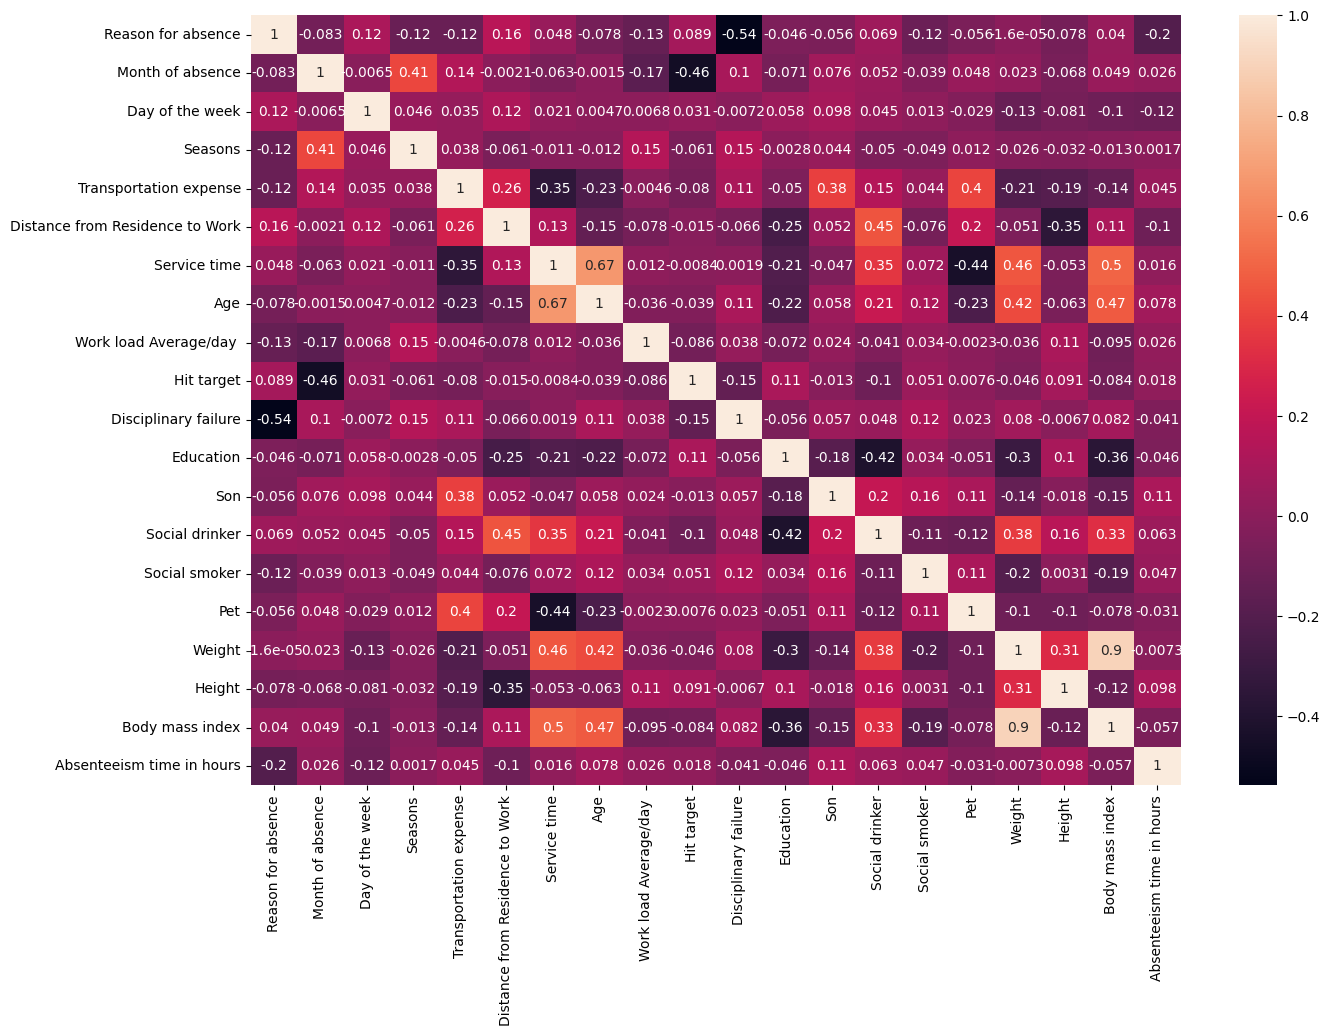

In [188]:
#Generating the correlation heatmap
plt.figure(figsize = (15, 10))
heat = sns.heatmap(process_data.drop(['ID'],axis=1).corr(), annot = True)
heat.figure.savefig('Heatmap.png')

In [189]:
# As per the heat map Weight is highly correlated with Body mass index. Moreover, weight divides with square of an height
#  is equal body mass index so weight and height column will be drop from the data set
process_data = process_data.drop(['Height','Weight'],axis=1)

## 3. Normalisation and Standardization

In [190]:
# All the numerical data will be scaled
scaling_col = ['Transportation expense', 'Distance from Residence to Work','Service time',
              'Work load Average/day ', 'Hit target','Body mass index']

In [191]:
for i in scaling_col:
    process_data[i]=(process_data[i]-min(process_data[i]))/(max(process_data[i])-min(process_data[i]))
    print(i,': Scaling Done')

Transportation expense : Scaling Done
Distance from Residence to Work : Scaling Done
Service time : Scaling Done
Work load Average/day  : Scaling Done
Hit target : Scaling Done
Body mass index : Scaling Done


In [192]:
# Spliting the data set in train-test
Pro_X = process_data.drop(['Absenteeism time in hours'], axis=1)
Pro_Y = process_data['Absenteeism time in hours']
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(Pro_X,Pro_Y, test_size=0.2)

In [193]:
# Applying KNN Machine learnig algorithm
Pro_KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_TRAIN,Y_TRAIN)
Final_KNN_predict = Pro_KNN_model.predict(X_TEST)
reg_acc(Y_TEST,Final_KNN_predict)

MSE of data:  250.49099099099104
***RMSE of data:  15.826907183369435 ***
Other Parameters:
R² :  -0.03195161867102825
MAE: 6.337837837837839


### Other algorithms

In [194]:
#Applying linear regression machine learning algorithm
linReg = LinearRegression().fit(X_TRAIN,Y_TRAIN)
linear_predict = linReg.predict(X_TEST)
reg_acc(Y_TEST,linear_predict)
print('Intercept :',linReg.intercept_)
print('Coefficient')

for i,coef in zip(process_data.columns,linReg.coef_):
    print (i,"-->",coef)

MSE of data:  233.41455724605126
***RMSE of data:  15.277910761817248 ***
Other Parameters:
R² :  0.03839843014511046
MAE: 6.254621681461226
Intercept : 14.467110051361178
Coefficient
ID --> -0.23803830817901933
Reason for absence --> -0.3983693092646976
Month of absence --> 0.23785159351393909
Day of the week --> -0.85794685092145
Seasons --> -0.01399041633934954
Transportation expense --> 1.388423596774416
Distance from Residence to Work --> -6.153672802226741
Service time --> -6.85981763844068
Age --> 0.35656712208467994
Work load Average/day  --> 2.436595942468548
Hit target --> 5.413565428482891
Disciplinary failure --> -12.335612176765212
Education --> -2.2977465008859848
Son --> 0.8837095819022163
Social drinker --> 1.4522209548673455
Social smoker --> -0.7129697144508897
Pet --> -0.41141456364146595
Body mass index --> -9.411016605968127


In [195]:

Deci_tree_pre = tree.DecisionTreeRegressor().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Decision Tree ML')
reg_acc(Deci_tree_pre,Y_TEST)


Ran_for_pre = RandomForestRegressor(n_estimators=50).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
print('Random Forest ML')
reg_acc(Ran_for_pre,Y_TEST)


print('Naive Bayes')
NB_pre = GaussianNB().fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
reg_acc(NB_pre,Y_TEST)

Decision Tree ML
MSE of data:  357.2939189189189
***RMSE of data:  18.902219946845367 ***
Other Parameters:
R² :  -1.12619137272545
MAE: 6.79054054054054
Random Forest ML
MSE of data:  281.50843282357357
***RMSE of data:  16.778213040236842 ***
Other Parameters:
R² :  -2.8998290290002178
MAE: 5.981961711711712
Naive Bayes
MSE of data:  767.5337837837837
***RMSE of data:  27.70440007983901 ***
Other Parameters:
R² :  -0.5739278637694087
MAE: 18.304054054054053


### KNN Map

### Measuring the number of 'k' suited with this Data set

In [196]:
list_mae,list_mse,list_r2,num=[],[],[],[]
for i in range(50):
    if i%2!=0:
        dummy_KNN = KNeighborsRegressor(n_neighbors=i).fit(X_TRAIN,Y_TRAIN).predict(X_TEST)
        num.append(i)
        list_mae.append(mean_absolute_error(dummy_KNN,Y_TEST))
        list_mse.append(mean_squared_error(dummy_KNN,Y_TEST))
        list_r2.append(r2_score(dummy_KNN,Y_TEST))

Kth Value: 25
Lowest MAE Value: 5.672432432432433


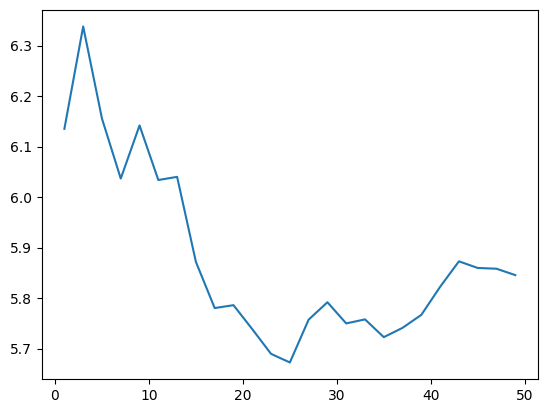

In [197]:
sns.lineplot(x=num,y=list_mae)
print('Kth Value:',num[list_mae.index(min(list_mae))])
print('Lowest MAE Value:',min(list_mae))

Kth Value: 7
Lowest MSE Value: 231.56811913954772


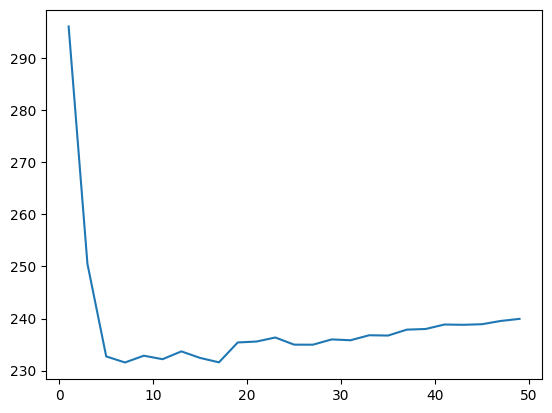

In [198]:
sns.lineplot(x=num,y=list_mse)
print('Kth Value:',num[list_mse.index(min(list_mse))])
print('Lowest MSE Value:',min(list_mse))

Kth Value 3
Lowest R2 Value: -3.564161206028367


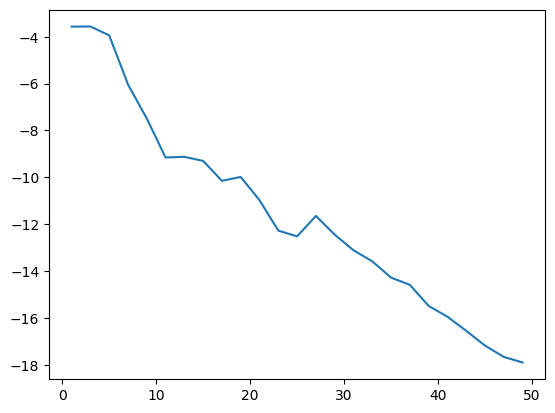

In [199]:
sns.lineplot(x=num,y=list_r2)
print('Kth Value',num[list_r2.index(max(list_r2))])
print('Lowest R2 Value:',max(list_r2))